# Session 2 - Exercises

## Functions

### Exercise 1  - Built-in

**(NO CODE)** Check which of the [built-in functions](https://docs.python.org/3.10/library/functions.html) allows you to:
- Iterate over multiple iterables at the same time
- Get the smallest/largest item in an iterable
- Check if any element of an iterable is True.
- Check if all elements of an iterable are True.

In [ ]:
# 1. zip
# 2. min, max
# 3. any
# 4. all

### Exercise 2 - Unknown Arguments

Create a `sum_all` function that sums all the positional arguments we provide. It must return the results below.

```python
sum_all(2, 3)        # 5
sum_all(2, 3, 4)     # 9
sum_all(2, 3, 4, 7)  # 16
```

In [11]:
### INSERT SOLUTION

In [12]:
def sum_all(*args):
    return sum(args)

In [13]:
assert sum_all(2, 3) == 5
assert sum_all(2, 3, 4) == 9
assert sum_all(2, 3, 4, 7) == 16

### Exercise 3 - (Advanced) Fibonacci

In a [Fibonacci sequence], each number is the sum of the two preceding ones. 

0, 1, 1, 2, 3, 5, 8, 13, 21, 34,...

Create a `fib` function that calculates the Fibonacci number at a given step.

```python
fib(0)             # 0 - first element
fib(1)             # 1 - second element
fib(2)             # 1 - third element
fib(3)             # 2 - fourth element
fib(8)             # 21 - ninth element
```

In [14]:
def fib(step):
    if step == 0:
        return 0
    elif step == 1 or step == 2:
        return 1
    else:
        return fib(step-1) + fib(step-2)

In [15]:
for i in range(10):
    print(fib(i))

0
1
1
2
3
5
8
13
21
34


### Exercise 4 - return, print

Below we have multiple functions that use print, return or a combination of both.

Without calling them (i.e. running `fun1()`), take a look at their code and predict their behaviour:
- Will they display something?; and
- Will they output something?

For `fun4()`, why do we need the "extra" return statement?

In [7]:
def fun1():
    print("Hi!")
    
def fun2():
    return "Hi!"

def fun3():
    fun1()
    fun2()
    
def fun4():
    return fun2()

In [ ]:
### TEST FUNCTIONS HERE
# fun1
# - prints only, no return
#
# fun2
# - return only, no print
#
# fun3
# - print only, no return (returns to function scope, but no to outside)
# 
# fun4
# - return only

## DataFrames

### Exercise 5  - Pandas basics
Use the practice code block below to find out the answers on `pandas` and DataFrames.

  1. What is the dtype of a Series with mixed data types? e.g. float, int, strings
  2. Create a DataFrame from a dict. e.g. band DataFrame from the learning notebook
  3. In separate cells, get the first and last 5 elements of the new dataframe (tip: methods from Basic Functionality section)


In [ ]:
### SOLUTION

# import
import pandas as pd


In [ ]:
# 1. The dtype of a mixed data type Series is
#  'object' if some element is not a number (e.g. string, list, dict)
#  'float' if members are mixed float and integers


In [ ]:
# 2. Create a dict , where the keys are the column_names and  the values are mappings of row key to to row value.
band_dict = {
    "Jacob" : { "Age": 45, "Skill": "drums"},
    "Kimbra" : { "Age": 20, "Skill": "piano"},
    "Daniel" : { "Age": 60, "Skill": "guitar"},
    "Tori" : { "Age": 47, "Skill": "bass"},
}


In [ ]:
band_df = pd.DataFrame(band_dict)
band_df


In [ ]:
# 3. First elements - head
band_df.head(5)


In [ ]:
# 3. Last elements - tail
band_df.tail(5)

## DataFrames Intermediate

### Exercise 6 - Auto

Load the `auto-mpg.csv` [auto-mpg dataset](https://archive.ics.uci.edu/ml/datasets/auto+mpg) into an `auto` variable. Then, get the following info:
- What is the average miles per galon?
- Are there any missing values?
- Do we have repeated car names?
- How many Fords, Dodges and VWs we have? You first need to split the `car name` into new `brand` and `model` columns.
  

In [16]:
import pandas as pd

In [17]:
auto = pd.read_csv('data/auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [18]:
# average miles per galon
auto['mpg'].mean()

23.514572864321615

In [19]:
# are there any missing values
auto.isna().sum().sum()

0

In [20]:
# do we have repeated car names
auto['car name'].duplicated().any()

True

In [21]:
# how many ford, dodges and vws
auto[['brand', 'model']] = auto['car name'].str.split(pat=' ', n=1, expand=True)  # split by first whitespace
auto['brand'].value_counts().loc[['ford', 'dodge', 'volkswagen']]

ford          51
dodge         28
volkswagen    15
Name: brand, dtype: int64

### Exercise 7 - Plotting

Can you replicate the plots below using the `auto` DataFrame? You can plot them one by one, but pay attention to the titles.
<p float='left'>
    <img src=media/exercise-mpg_per_year.png width="400" />
    <img src=media/exercise-models_per_cylinders.png width="400" />
    <img src=media/exercise-weight_acceleration.png width="400" />
</p>

In [26]:
%matplotlib inline

<AxesSubplot:title={'center':'Average Miles per Galon per Model Year'}, xlabel='model year'>

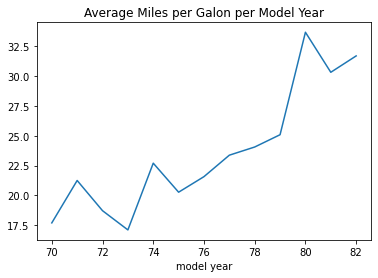

In [29]:
auto.groupby('model year').agg({'mpg': 'mean'}).plot(title='Average Miles per Galon per Model Year', legend=False)

<AxesSubplot:title={'center':'Number of Models per Number of Cylinders'}, xlabel='cylinders'>

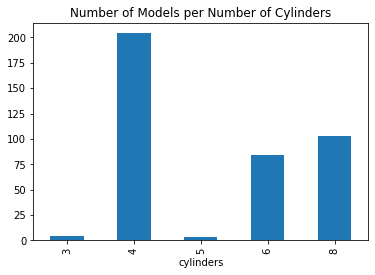

In [34]:
auto.groupby('cylinders').size().plot(kind='bar', title='Number of Models per Number of Cylinders')

<AxesSubplot:title={'center':'More Weight, Less Acceleration'}, xlabel='weight', ylabel='acceleration'>

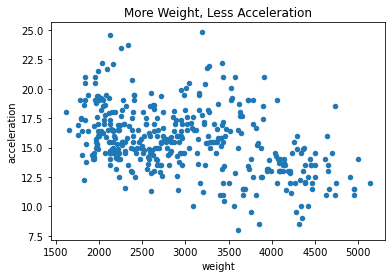

In [37]:
auto.plot.scatter(x='weight', y='acceleration', title='More Weight, Less Acceleration')